In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline

import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf  # Connects Plotly to Pandas

from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()

import requests
from bs4 import BeautifulSoup
import json
from pandas import DataFrame as df

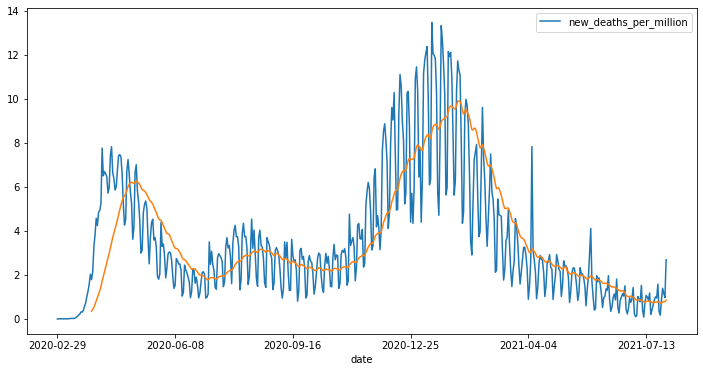

In [25]:
# Getting the data
owid_df = pd.read_csv('owid-covid-data.csv')

covid_df = owid_df.location.unique()
indexer = owid_df[owid_df['location'] == 'United States'].index

covid_df = owid_df.loc[indexer, 'date': 'new_deaths_per_million']
covid_df = covid_df.dropna()
covid_df.set_index('date', inplace=True)
covid_df.drop(covid_df.columns.difference(['new_deaths_per_million']), 1, inplace=True)

covid_df.plot(figsize=(12, 6))
covid_df.rolling(window=30).mean()['new_deaths_per_million'].plot()

covid_df = covid_df.asfreq('d')
#covid_df.info()

train_df = covid_df.iloc[:450]
test_df = covid_df.iloc[449:]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning:

invalid value encountered in less_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning:

invalid value encountered in greater_equal



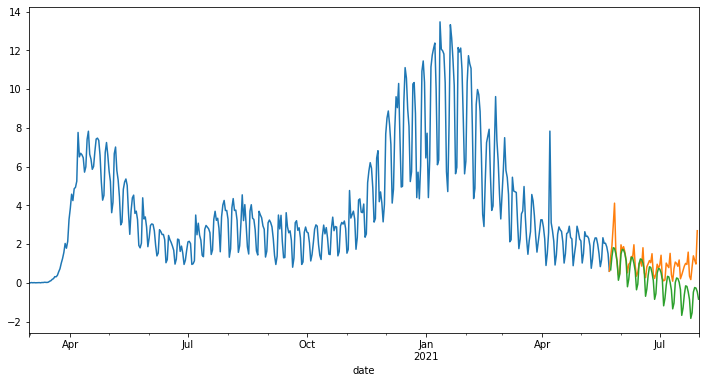

In [34]:
# Holt-Winters model with training data
# Using average, trend and seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit_model = ExponentialSmoothing(train_df['new_deaths_per_million'], trend='add', seasonal='add', seasonal_periods=14).fit()
prediction = fit_model.forecast(69)
train_df['new_deaths_per_million'].plot(figsize=(12, 6))
test_df['new_deaths_per_million'].plot(figsize=(12, 6)) 
prediction.plot() 
# green line is the prediction while orange is the actual


In [27]:
# Evaluating predictions: Mean absolute Error
# Using scikit-leanr library
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [36]:
# Manual function
def mae(y1, y2, axis=0):
  y1_np = y1.to_numpy()
  y2_np = y2.to_numpy()
  return np.mean(np.abs(y1_np - y2_np), axis=axis)

mae(test_df, prediction, None)

1.1044112234816725

In [35]:
# Using scikit
mean_absolute_error(test_df, prediction)

0.8996646494477002

In [37]:
# Mean squared error
# Manually
def mse(y1, y2, axis=0):
  y1_np = y1.to_numpy()
  y2_np = y2.to_numpy()
  return ((y1_np - y2_np) ** 2).mean(axis=axis)

mse(test_df, prediction, None)

1.9748946804859366

In [38]:
# Using scikit
mean_squared_error(test_df, prediction)

1.3175020701124378

In [39]:
# Root mean squared error
np.sqrt(mean_squared_error(test_df, prediction))

1.1478249300796868

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning:

invalid value encountered in less_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning:

invalid value encountered in greater_equal



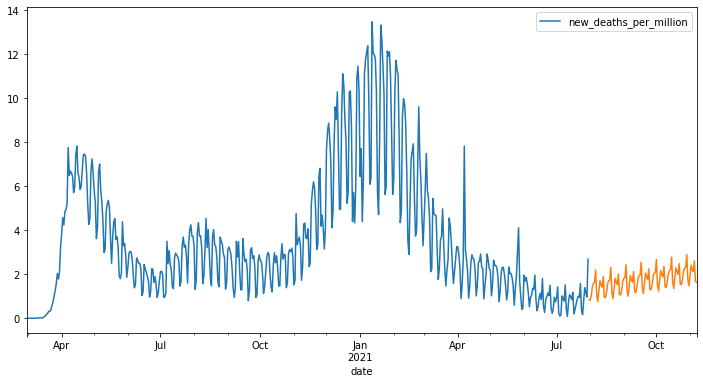

In [40]:
# Predict the future
covid_model = ExponentialSmoothing(covid_df['new_deaths_per_million'], trend='add', seasonal_periods=14, seasonal='add').fit()
covid_forecast = covid_model.forecast(100)
covid_df.plot(figsize=(12, 6))
covid_forecast.plot()